In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import math
data = pd.read_csv('heart.csv')

## About data set:-


This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack
Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack


In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
data.shape

(303, 14)

## How many total observations in data?

As show above there are total 303 observation is there.

## How many independent variables?

There are 13 independent variable.

## Which is dependent variable?

target is dependent variable

In [26]:
feature_cols = ['age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope','ca','thal']
X = data[feature_cols]  
y=data.target 

## Which are most useful variable in estimation? Prove using correlation.


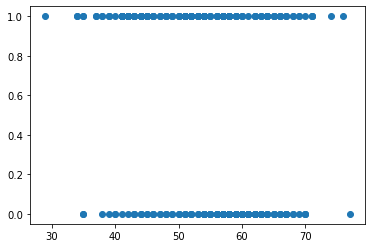

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [27]:
plt.scatter(data.age,data.target)
plt.show()
data.corr()

## Using gredient descent

In [28]:
X_train= data[feature_cols]  
y_train=data.target 
learning_rate = 0.01
epochs = 100000
n_sample, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0
# Defining function
def sigmoid(x):
    return 1/ (1 + np.exp(-x))
# Training model
for _ in range(epochs):
    model = np.dot(X_train, weights) + bias
    y_predicted = sigmoid(model)
    dw = (1 / n_sample) * np.dot(X_train.T, (y_predicted - y_train))
    db = (1 / n_sample) * np.sum(y_predicted - y_train)
    weights -= learning_rate * dw
    bias -= learning_rate * db
model = np.dot(X_train, weights) + bias
y_pred = sigmoid(model)
y_pred = list(map(lambda x: 1 if x > 0.5 else 0, y_pred))
# Accuracy
print("Accuracy : ",accuracy_score(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
print(cm)
print(classification_report(y_train, y_pred))


E:\Anacoda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Accuracy :  0.7854785478547854
[[ 80  58]
 [  7 158]]
              precision    recall  f1-score   support

           0       0.92      0.58      0.71       138
           1       0.73      0.96      0.83       165

    accuracy                           0.79       303
   macro avg       0.83      0.77      0.77       303
weighted avg       0.82      0.79      0.78       303



## Model Development and Prediction Using sklearn

Here, the Dataset is broken into two parts in a ratio of 80:20. It means 80% data will be used for model training and 20% for model testing.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
# Creating model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# Predicting result
y_pred = classifier.predict(X_test)
# Accuracy
print("Accuracy : ",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


Accuracy :  0.8524590163934426
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



E:\Anacoda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.
Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 22 and 5 are actual predictions, and 4 and 30 are incorrect predictions.

we got a classification rate of 85%
Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. That is 85% of the time.

Recall: If there are patients who have heart disease in the patient in the test set and your Logistic Regression model can identify it 85% of the time.